In [1]:
import pandas as pd


df = pd.read_csv('healthcare-stroke-data-train.csv')

In [2]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,33410,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
1,33976,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
2,49744,female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3,3442,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4,45404,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0
5,49084,Male,20.0,0,0,No,Private,Urban,57.51,21.4,Unknown,0
6,72491,Male,53.0,0,0,Yes,Private,Urban,74.66,29.2,smokes,0
7,18866,female,75.0,0,0,Yes,Self-employed,Urban,96.95,41.4,never smoked,0
8,5475,Female,39.0,0,0,Yes,Private,Rural,69.58,28.1,Unknown,0
9,46284,Male,53.0,1,0,Yes,Self-employed,Urban,227.51,34.7,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3832 non-null   int64  
 1   gender             3832 non-null   object 
 2   age                3832 non-null   float64
 3   hypertension       3832 non-null   int64  
 4   heart_disease      3832 non-null   int64  
 5   ever_married       3832 non-null   object 
 6   work_type          3832 non-null   object 
 7   Residence_type     3832 non-null   object 
 8   avg_glucose_level  3832 non-null   float64
 9   bmi                3674 non-null   float64
 10  smoking_status     3832 non-null   object 
 11  stroke             3832 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 359.4+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3674.000000,3832.000000
mean,36476.492171,43.312171,0.096294,0.053236,105.875525,28.887806,0.048800
std,21277.485576,22.568943,0.295033,0.224533,44.826436,7.878679,0.215477
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17385.250000,26.000000,0.000000,0.000000,77.365000,23.500000,0.000000
50%,36877.000000,45.000000,0.000000,0.000000,91.850000,28.000000,0.000000
75%,54749.250000,61.000000,0.000000,0.000000,113.632500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [5]:
df.nunique()

id                   3832
gender                  5
age                   103
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3163
bmi                   396
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  158
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [8]:
df['gender'].value_counts()

gender
Female    1594
Male      1115
female     648
male       474
Other        1
Name: count, dtype: int64

In [9]:
df['gender'] = df['gender'].str.capitalize()
df = df[df['gender'] != 'Other']

In [10]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
df['gender'] = lbl.fit_transform(df['gender'])

In [11]:
df['ever_married'] = (df['ever_married']=='Yes').astype(int)

In [12]:
df['work_type'].value_counts()

work_type
Private          2178
Self-employed     632
children          517
Govt_job          491
Never_worked       13
Name: count, dtype: int64

In [13]:
df = pd.get_dummies(df, columns=['work_type'], prefix='work', drop_first=True, dtype=int)

In [14]:
df['Residence_type'] = (df['Residence_type']=='Urban').astype(int)

In [15]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1413
Unknown            1171
formerly smoked     669
smokes              578
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(
    df,
    columns=['smoking_status'],
    prefix='smoke',
    drop_first=False,
    dtype=int
)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3831 entries, 0 to 3831
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3831 non-null   int64  
 1   gender                 3831 non-null   int64  
 2   age                    3831 non-null   float64
 3   hypertension           3831 non-null   int64  
 4   heart_disease          3831 non-null   int64  
 5   ever_married           3831 non-null   int64  
 6   Residence_type         3831 non-null   int64  
 7   avg_glucose_level      3831 non-null   float64
 8   bmi                    3831 non-null   float64
 9   stroke                 3831 non-null   int64  
 10  work_Never_worked      3831 non-null   int64  
 11  work_Private           3831 non-null   int64  
 12  work_Self-employed     3831 non-null   int64  
 13  work_children          3831 non-null   int64  
 14  smoke_Unknown          3831 non-null   int64  
 15  smoke_for

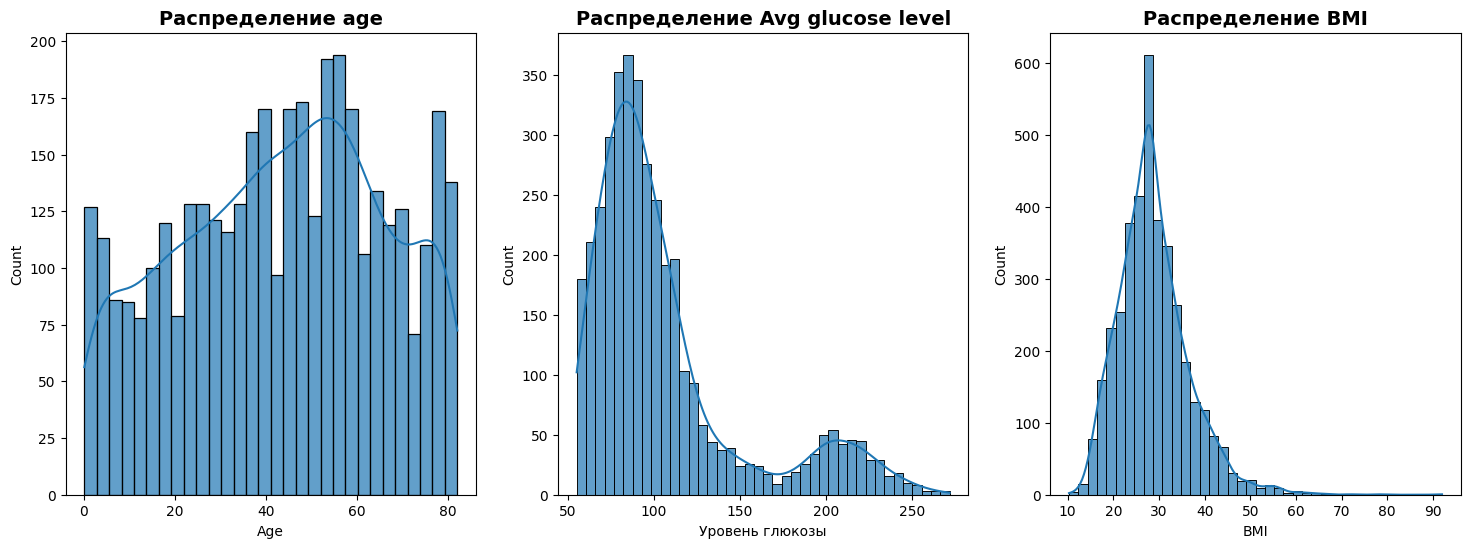

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 3, 1)
sns.histplot(data=df, x='age', kde=True, bins=30, alpha=0.7)
plt.title('Распределение age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')

ax2 = plt.subplot(1, 3, 2)
sns.histplot(data=df, x='avg_glucose_level', kde=True, bins=40, alpha=0.7)
plt.title('Распределение Avg glucose level', fontsize=14, fontweight='bold')
plt.xlabel('Уровень глюкозы')
plt.ylabel('Count')

ax3 = plt.subplot(1, 3, 3)
sns.histplot(data=df, x='bmi', kde=True, bins=40, alpha=0.7)
plt.title('Распределение BMI', fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.show()

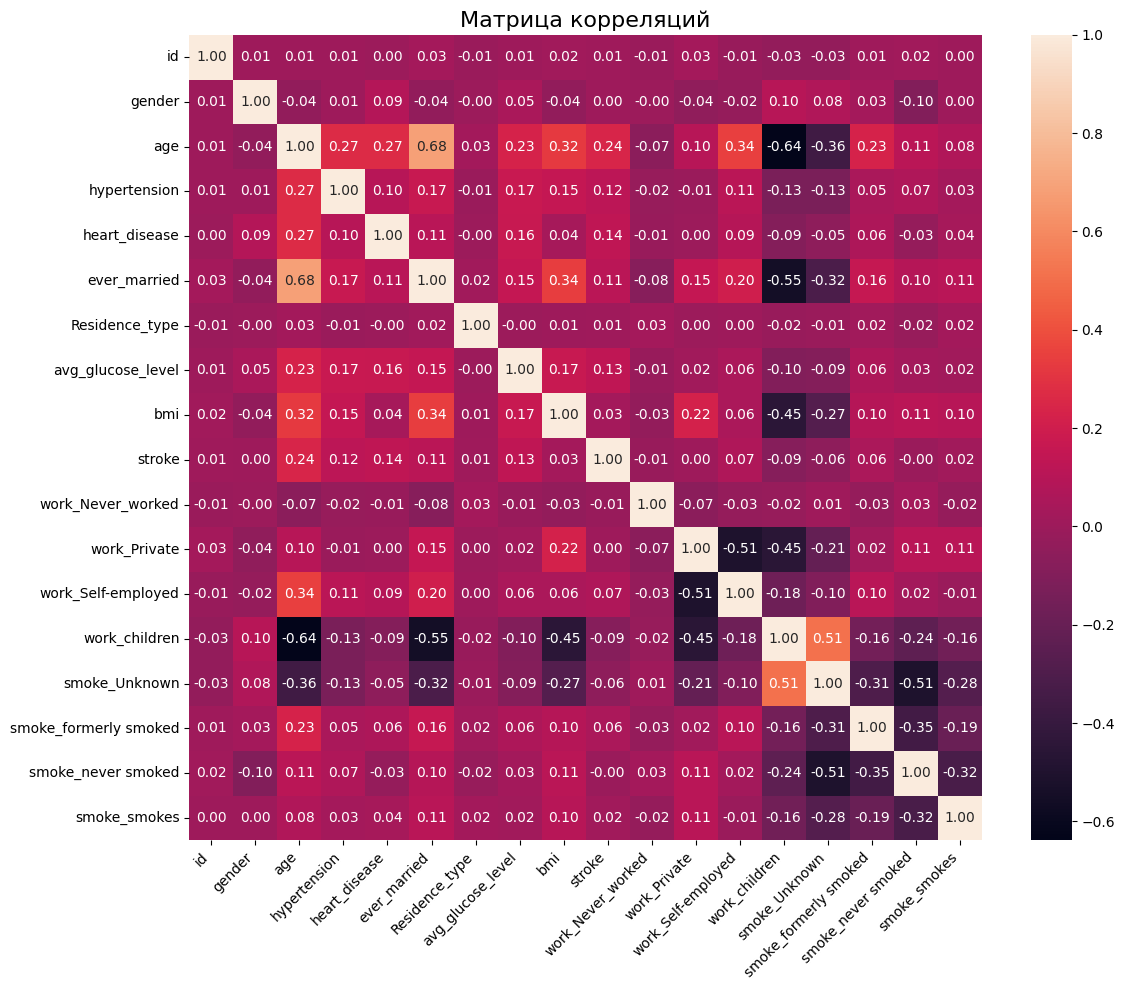

In [19]:
plt.figure(figsize=(12, 10))

corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

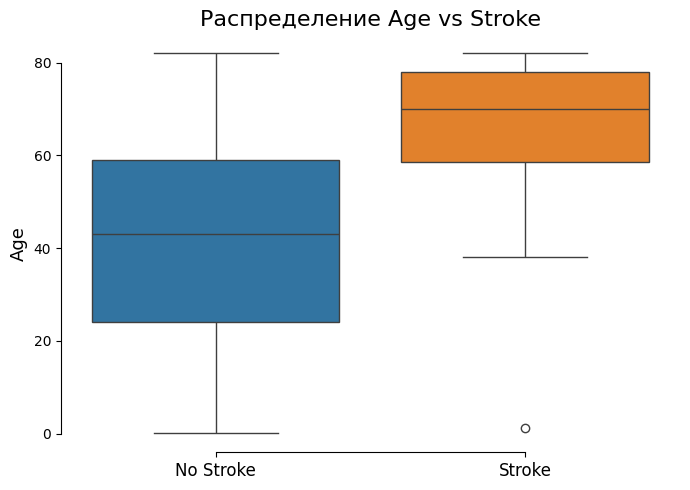

In [20]:
plt.figure(figsize=(7, 5))

sns.boxplot(data=df, x='stroke', y='age', hue='stroke', legend=False)

plt.title('Распределение Age vs Stroke', fontsize=16)
plt.xlabel('')
plt.ylabel('Age', fontsize=13)
plt.xticks([0, 1], ['No Stroke', 'Stroke'], fontsize=12)

sns.despine(trim=True)
plt.tight_layout()
plt.show()